# Chapter 5 The Basis


#### Lemma 5.5.1 (Superfluous-Vector Lemma): 
For any set S and any vector v ∈ S, if v can be written as a linear combination of the other vectors in S then Span (S − {v}) = Span S

#### Definition 5.5.2 Linear dependence
Vectors v1, . . . , vn are linearly dependent if the zero vector can be written as a nontrivial linear combination of the vectors:
    0=α1v1 +···+αnvn

It is equivalent to "how to tell the null space of a mtrix contains only zero vector?", "how to tell if homogeneous linear system has only trivial solutions?"

#### Lemma 5.5.8 
A subset of a linearly independent set is linearly independent.

#### Lemma 5.5.9 (Span Lemma)
Let v1, . . . , vn be vectors. A vector vi is in the span of the other vectors if and only if the zero vector can be written as a linear combination of v1, . . . , vn in which the coefficient of vi is nonzero.


#### Definition 5.6.1 Basis
Let V be a vector space. A basis for V is a linearly independent set of generators for V.

- Property B1 (Spanning) Span B = V, and
- Property B2 (Independent) B is linearly independent.

Knowing Span A = V, to prove Span B = V, we could prove that A is in Span B.


#### Lemma 5.6.9
The standard generators for FD form a basis.

#### Lemma 5.6.11 (Subset-Basis Lemma)
Any finite set T of vectors contains a subset B that is a basis for Span T.

#### Superset-basis Lemma
For any vector space V and any linearly independent set T of vectors, V has a basis that contains all of T.

Using growing algorithm to find that basis.

#### Lemma 5.7.1 (Unique-Representation Lemma)
Let a1, . . . , an be a basis for a vector space V. For any vector v ∈ V, there is exactly one representation of v in terms of the basis vectors.

#### Lemma 5.11.1 (Exchange Lemma): 

Suppose S is a set of vectors and A is a subset of S. Suppose z is a vector in
Span S and not in A such that A ∪ {z} is linearly independent. Then
there is a vector w ∈ (S − A) such that Span S = Span ({z}∪S − {w}).

## Questions
Question 5.2.1: Given a vector v and a positive integer k, what is the k-sparse vector closest to v?
Question 5.2.4: For a given vector space V, how can we tell if V = Span {a1, . . . , an}?
Question 5.2.5: For a given vector space V, what is the minimum number of vectors whose span equals V?
Computational Problem 5.10.1: Finding a basis of the vector space spanned by given vectors

In [60]:
# lossy compression
# 1. Choose closest k-sparse vector, won't keep all the information
# 2. Find a set of vector as coordinate, would not compress well
# 3. hybrid, convert the coordinates, find k-sparse vector, then convert back

# TODO: what are some properties of the coordinates to make it compress well?

In [61]:
# Algorithm to find minimum number of vectors

# dominating set: every node is either in the set of adjacent to a node in the set
# It is a NP-hard problem, no polynomial time algorithm

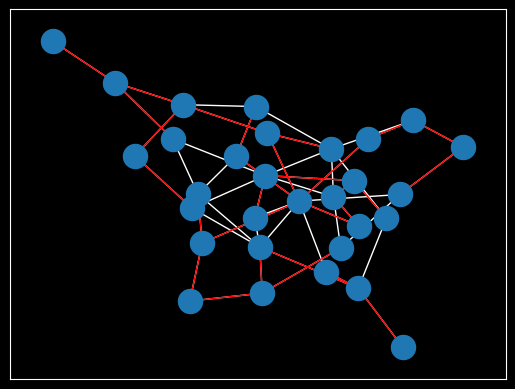

In [62]:
# MSF: minimum spanning forest greedy algorithm finds the correct solution.

import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a random graph with n vertices and m edges
n = 30
m = 50
G = nx.gnm_random_graph(n, m, seed=random.seed())

# Compute the minimum spanning tree of the graph
T = nx.algorithms.tree.minimum_spanning_tree(G)

# Draw the graph and highlight the edges in the minimum spanning forest
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='w')
nx.draw_networkx_edges(T, pos, edge_color='r')

# Show the plot
plt.show()

In [63]:
# Linear dependency
# Computational Problem 5.5.5: Testing linear dependence
# • input: a list [v1,...,vn] of vectors
# • output: DEPENDENDENT if the vectors are linearly dependent, and INDEPEN- DENT otherwise.

In [64]:
# Both Grow and shrink algorithm finds the set which is linear dependent

In [65]:
from book.vecutil import list2vec

L = [[0,0,0],[1,0,0],[0,1,0],[1,1,0],[0,0,1],[1,0,1],[0,1,1],[1,1,1]]
corners = [list2vec(v) for v in L]

In [66]:
def line_segment(pt1, pt2, samples=100):
    return [(i/samples)*pt1 + (1-i/samples)*pt2 for i in range(samples+1)]

In [67]:
line_segments = [line_segment(corners[i], corners[j]) for i,j in
 [(0,1),(2,3), (0,2),(1,3),(4,5),(6,7),(4,6),(5,7),(0,4),(1,5),(2,6), (3,7)]]

In [68]:
pts = sum(line_segments, [])

In [69]:
# Define pixel with camera coordinates system
def pixel(x): return (x[0], x[1])
def scale_down(x): return list2vec([x[0]/x[2], x[1]/x[2], 1])

In [70]:
# Labs, perspective change
from book.vec import Vec
from book.mat import Mat
from book.matutil import *
C = {'x1', 'x2', 'x3'}
R = {'y1', 'y2', 'y3'}
y = Vec(R, {'y1': 2, 'y2': 3, 'y3': 4})
def move2board(y):
    return Vec(R, {d: y[d] / y['y3'] for d in y.f})
move2board(y)

Vec({'y2', 'y3', 'y1'},{'y1': 0.5, 'y2': 0.75, 'y3': 1.0})

In [71]:
D = {(r, c) for c in C for r in R}
def make_equations(x1, x2, w1, w2):
    x = Vec({'x2', 'x1', 'x3'},{'x2': x2, 'x1': x1, 'x3': 1})
    y1 = y2 = y3 = x

    u = Vec(D, {})
    for d in D:
      if d[0] == 'y3':
        u[d[0], d[1]] = w1*x[d[1]]
      if d[0] == 'y1':
        u[d[0], d[1]] = -x[d[1]]

    v = Vec(D, {})
    for d in D:
      if d[0] == 'y3':
        v[d[0], d[1]] = w2*x[d[1]]
      if d[0] == 'y2':
        v[d[0], d[1]] = -x[d[1]]

    return [u, v]

make_equations(1, 4, 3, 5)

[Vec({('y1', 'x3'), ('y2', 'x3'), ('y3', 'x1'), ('y3', 'x2'), ('y1', 'x1'), ('y2', 'x1'), ('y1', 'x2'), ('y2', 'x2'), ('y3', 'x3')},{('y1', 'x3'): -1, ('y3', 'x1'): 3, ('y3', 'x2'): 12, ('y1', 'x1'): -1, ('y1', 'x2'): -4, ('y3', 'x3'): 3}),
 Vec({('y1', 'x3'), ('y2', 'x3'), ('y3', 'x1'), ('y3', 'x2'), ('y1', 'x1'), ('y2', 'x1'), ('y1', 'x2'), ('y2', 'x2'), ('y3', 'x3')},{('y2', 'x3'): -1, ('y3', 'x1'): 5, ('y3', 'x2'): 20, ('y2', 'x1'): -1, ('y2', 'x2'): -4, ('y3', 'x3'): 5})]

In [72]:
w = Vec(D, {('y1', 'x1'): 1})

# top left
tl = make_equations(358, 36, 0, 0)
# bottom left
bl = make_equations(329, 597, 0, 1)
# top right
tr = make_equations(592, 157, 1, 0)
# bottom right
br = make_equations(580, 483, 1, 1)

rows = dict(zip(list(range(0, 9)), tl+bl+tr+br+[w]))
L = rowdict2mat(rows)
b = [0] * 9; b[-1] = 1
b = list2vec(b)

In [73]:
from solve import solve  # sweet conversion
H = solve(L, b)
L*H - b

Vec({0, 1, 2, 3, 4, 5, 6, 7, 8},{0: 1.2434497875801753e-14, 1: 3.552713678800501e-15, 2: 7.105427357601002e-15, 3: 0.0, 4: 0.0, 5: 1.4210854715202004e-14, 6: 0.0, 7: -1.1368683772161603e-13, 8: 0.0})

In [74]:
from book.image_mat_util import *

(X_pts, colors) = file2mat('./book/board.png', ('x1','x2','x3'))

In [75]:
# turning the H vector to matrix, D = [R, C], maps from Camera to Whiteboard
HM = Mat((R, C), {})
for d in D:
    HM[d] = H[d[0], d[1]]

Y_pts = HM * X_pts

In [76]:
def mat_move2board(Y):
    return coldict2mat({k: move2board(col) for k, col in mat2coldict(Y).items()})

Y_board = mat_move2board(Y_pts)

In [77]:
mat2display(Y_board, colors, ('y1', 'y2', 'y3'), scale=400, xmin=None, ymin=None)

Hit Enter once the image is displayed.... 

In [78]:
# summary of the algorithm
def convert_perspective(points, png_file, scale=400):
    w = Vec(D, {('y1', 'x1'): 1})

    # top left
    tl = make_equations(*points[0], 0, 0)
    # bottom left
    bl = make_equations(*points[1], 0, 1)
    # top right
    tr = make_equations(*points[2], 1, 0)
    # bottom right
    br = make_equations(*points[3], 1, 1)

    rows = dict(zip(list(range(0, 9)), tl+bl+tr+br+[w]))
    L = rowdict2mat(rows)

    b = [0] * 9; b[-1] = 1
    b = list2vec(b)

    H = solve(L, b)

    # turning the H vector to matrix, D = [R, C], maps from Camera to Whiteboard
    HM = Mat((R, C), {})
    for d in D:
        HM[d] = H[d[0], d[1]]


    (X_pts, colors) = file2mat(png_file, ('x1','x2','x3'))
    Y_pts = HM * X_pts
    Y_board = mat_move2board(Y_pts)
    mat2display(Y_board, colors, ('y1', 'y2', 'y3'), scale=scale, xmin=None, ymin=None)


In [79]:
# Test on the board.png
board_points = [
    (358, 36),
    (329, 597),
    (592, 157),
    (580, 483)
]
convert_perspective(board_points, './book/board.png', scale=400)

Hit Enter once the image is displayed.... 

In [80]:
cit_points = [
    (81, 71),
    (79, 144),
    (136, 62),
    (134, 144),
]
# convert_perspective(cit_points, './book/cit.png', scale=400)

Hit Enter once the image is displayed.... 

In [81]:
hyatt_points = [
    (954, 190),
    (953, 1111),
    (1567, 485),
    (1566, 1164),
]
# convert_perspective(cit_points, './book/hyatt.png', scale=100)


Hit Enter once the image is displayed.... 